# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

## Concept 14: CNNs in Keras: Practical Example (Notebook 2 of 2)

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


### 2.  Break Dataset into Training, Testing, and Validation Sets

In [2]:
import numpy as np
from keras.utils import np_utils

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# onehot encoding of labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 3. Visualize the First 24 Training Images

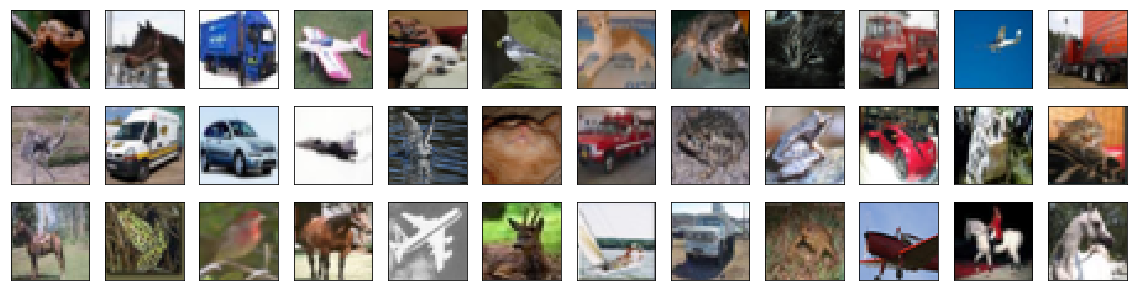

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [4]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255 
x_valid = x_valid.astype('float32')/255

### 5. Define the Model Architecture 

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', 
                     input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

### 6. Compile the Model 

In [6]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [7]:
from keras.callbacks import ModelCheckpoint   

batch_size = 32
epochs = 20

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
Epoch 00000: val_loss improved from inf to 1.22660, saving model to model.weights.best.hdf5
200s - loss: 1.5793 - acc: 0.4301 - val_loss: 1.2266 - val_acc: 0.5848
Epoch 2/20
Epoch 00001: val_loss improved from 1.22660 to 1.01222, saving model to model.weights.best.hdf5
217s - loss: 1.1728 - acc: 0.5877 - val_loss: 1.0122 - val_acc: 0.6420
Epoch 3/20
Epoch 00002: val_loss improved from 1.01222 to 0.96104, saving model to model.weights.best.hdf5
215s - loss: 1.0450 - acc: 0.6373 - val_loss: 0.9610 - val_acc: 0.6686
Epoch 4/20
Epoch 00003: val_loss did not improve
217s - loss: 0.9944 - acc: 0.6579 - val_loss: 1.9029 - val_acc: 0.5168
Epoch 5/20
Epoch 00004: val_loss did not improve
181s - loss: 0.9719 - acc: 0.6698 - val_loss: 1.0390 - val_acc: 0.6554
Epoch 6/20
Epoch 00005: val_loss did not improve
173s - loss: 0.9971 - acc: 0.6711 - val_loss: 1.2074 - val_acc: 0.6014
Epoch 7/20
Epoch 00006: val_loss did not improve
188s - loss:

### 8. Load the Model with the Best Validation Accuracy

In [8]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [9]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7186
